In [10]:
import pysolar as ps
import datetime as dt
import numpy as np
import pandas as pd


In [6]:
# Pick a location on Earth, in my case, it is the middle of my working area
lat, lon = 47.845833333333324, -113.51250000000002

In [7]:
######## Compute everything

dates=[]
azimuths=[]
altitudes=[]
radiations=[]

for m in range(1,13):
    if m in [1,3,5,7,8,10,12]: D=31
    elif m in [4,6,9,11]: D=30
    elif m==2: D=28
    else: print("Error "+str(m))
    
    for d in range(1,D+1):
        for h in range(24):
            date = dt.datetime(2005, m,d,h, tzinfo=dt.timezone(offset=-dt.timedelta(hours=7)))
            dates.append(date)
            altitudes.append(ps.solar.get_altitude(lat, lon, date))
            radiations.append(np.maximum(0, ps.radiation.get_radiation_direct(date, altitudes[-1])))
            azimuths.append(ps.solar.get_azimuth(lat, lon, date))
            
azimuths = np.array(azimuths)
altitudes=np.array(altitudes)
radiations=np.array(radiations)

<Axes: xlabel='azimuth', ylabel='altitude'>

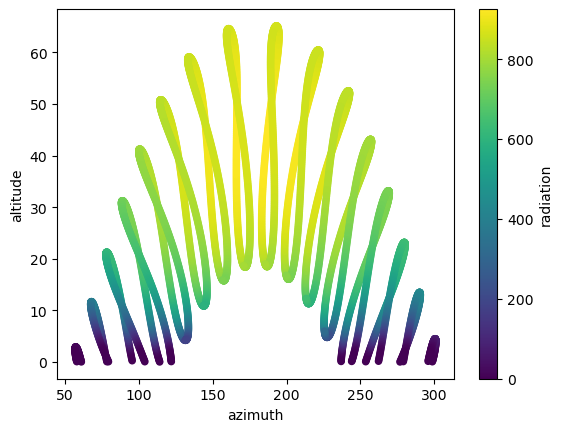

In [13]:
sun_data = pd.DataFrame({'date':dates, 'azimuth':azimuths,
                         'altitude':altitudes, 'radiation':radiations})
sun_data.set_index('date', inplace=True)
sun_data.where(sun_data.altitude>0.).plot.scatter(x='azimuth', y='altitude', c='radiation')
# plt.title(r'radiation ($W/m^2$)')

In [ ]:
sun_data.to_csv('SR_full_data.csv')